In [11]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns
from scipy.stats import probplot



file = "/Users/hugobombaca/Desktop/iron/LABS WEEK 5/lab-eda-bivariate/data.csv"
df = pd.read_csv(file)

In [12]:
crosstab_result = pd.crosstab(df["category"], df["isBestSeller"])
crosstab_result
import matplotlib.pyplot as plt



In [13]:
counts= df["category"].value_counts()
best_counts = df.groupby("category")["isBestSeller"].sum()
prop = best_counts/counts
sort = prop.sort_values(ascending = False)
sort

category
Grocery                             0.058135
Smart Home Security & Lighting      0.057692
Health & Personal Care              0.057686
Mobile Phone Accessories            0.042471
Power & Hand Tools                  0.035339
                                      ...   
CD, Disc & Tape Players             0.000000
General Music-Making Accessories    0.000000
Snowboard Boots                     0.000000
Boxes & Organisers                  0.000000
eBook Readers & Accessories         0.000000
Length: 296, dtype: float64

In [14]:
chi2, pvalue, _, _ = chi2_contingency(crosstab_result)
print(chi2,pvalue)
num_rows, num_cols = crosstab_result.shape
n = np.sum(crosstab_result)
cramers_v = np.sqrt(chi2 / (n * (min(num_rows, num_cols) - 1)))
print(cramers_v)

36540.20270061387 0.0
isBestSeller
False    0.122483
True     2.139853
dtype: float64


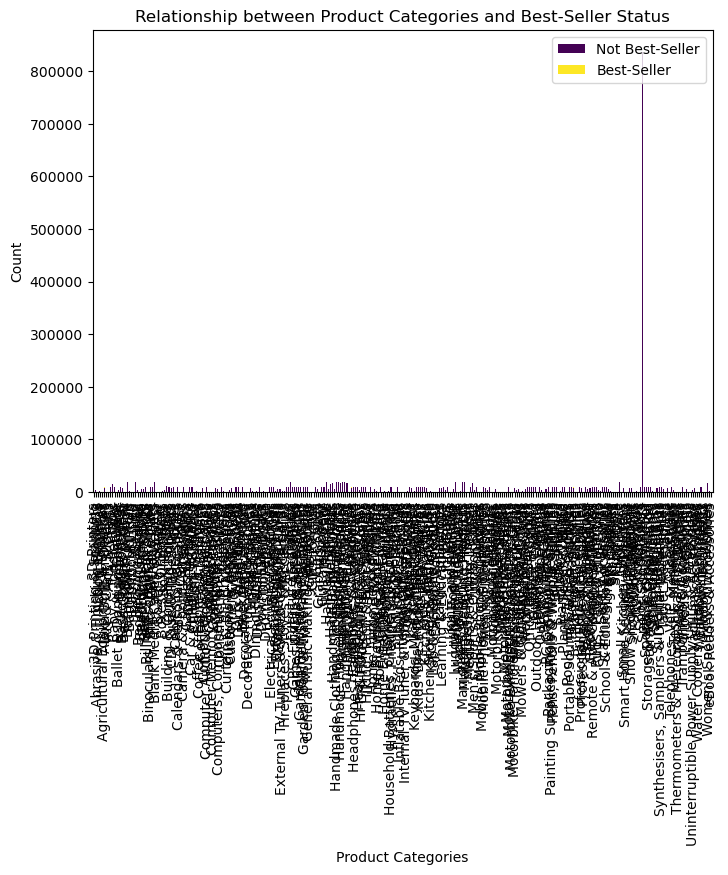

In [15]:
ax = crosstab_result.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')

ax.set_xlabel('Product Categories')
ax.set_ylabel('Count')
ax.set_title('Relationship between Product Categories and Best-Seller Status')

ax.legend(['Not Best-Seller', 'Best-Seller'], loc='upper right')

plt.show()

In [16]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df= df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


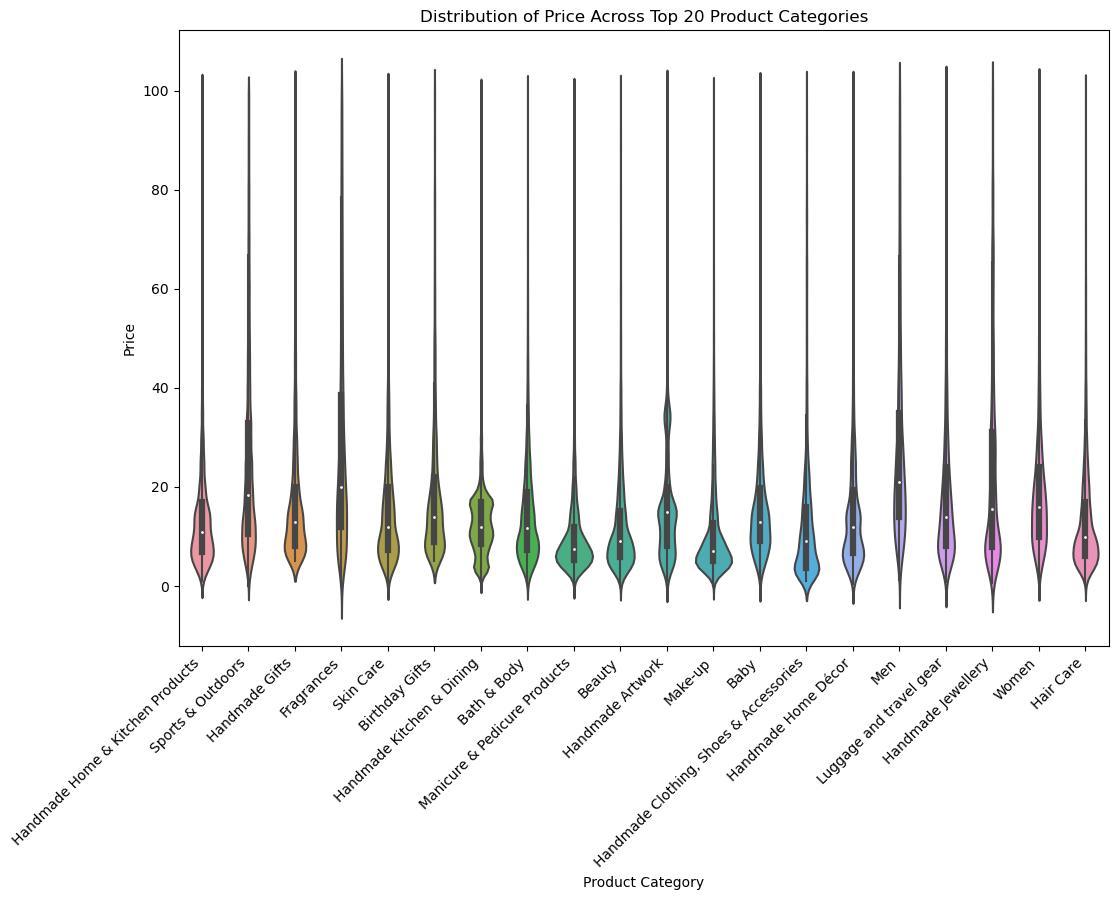

In [17]:
top_categories = df['category'].value_counts().nlargest(20).index
df_top_categories = df[df['category'].isin(top_categories)]

# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=df_top_categories)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.title('Distribution of Price Across Top 20 Product Categories')
plt.show()

# Identify the category with the highest median price
highest_median_category = df.groupby('category')['price'].median().idxmax()

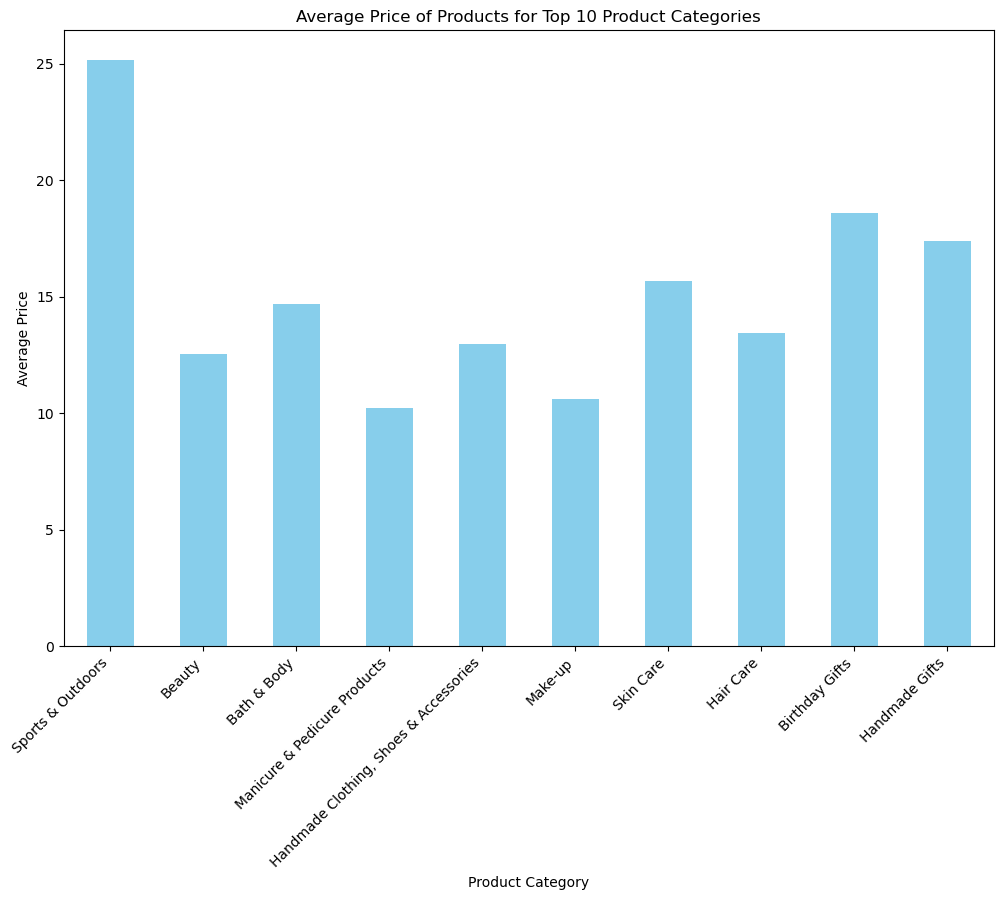

In [18]:
average_price_by_category = df.groupby('category')['price'].mean()

# Filter out the top 10 categories based on count
top_10_categories = df['category'].value_counts().nlargest(10).index
average_price_top_10 = average_price_by_category[top_10_categories]

plt.figure(figsize=(12, 8))
average_price_top_10.plot(kind='bar', color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.title('Average Price of Products for Top 10 Product Categories')
plt.xticks(rotation=45, ha='right')
plt.show()
highest_average_price_category = average_price_top_10.idxmax()
highest_average_price = average_price_top_10.max()

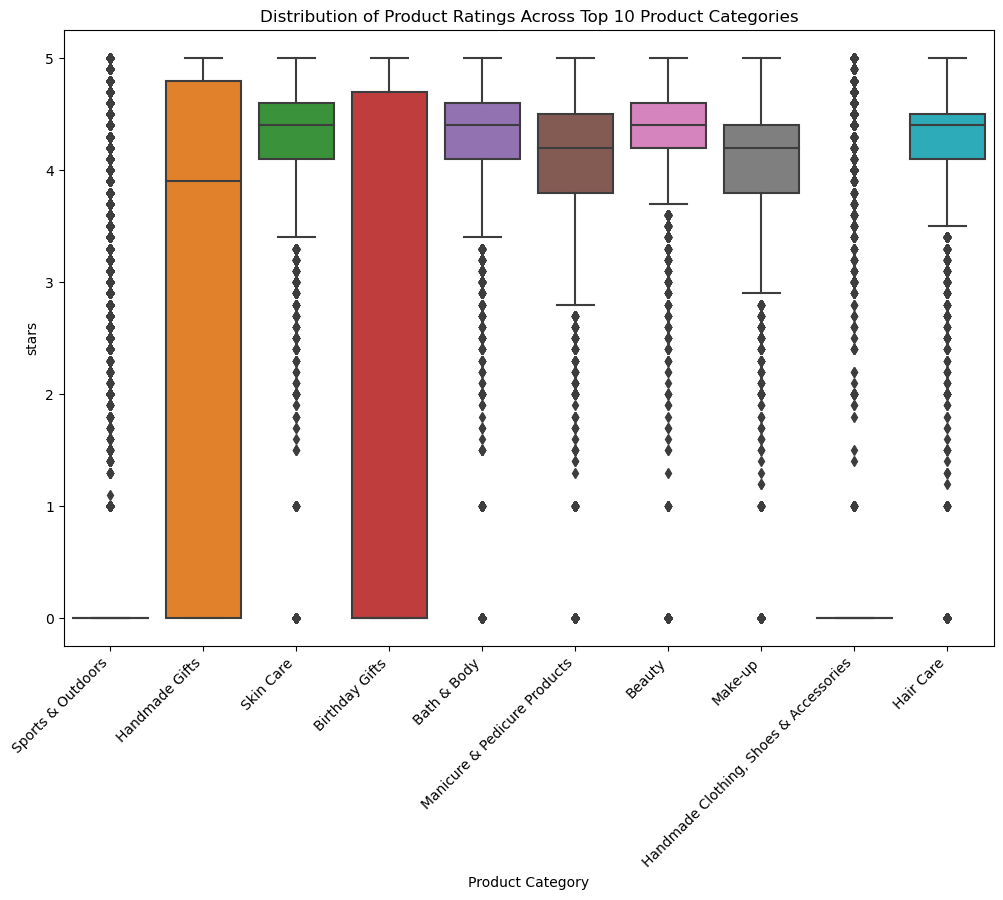

In [21]:
top_categories = df['category'].value_counts().nlargest(10).index
df_top_categories = df[df['category'].isin(top_categories)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=df_top_categories)
plt.xlabel('Product Category')
plt.ylabel('stars')
plt.title('Distribution of Product Ratings Across Top 10 Product Categories')
plt.xticks(rotation=45, ha='right')
plt.show()
highest_median_rating_category = df.groupby('category')['stars'].median().idxmax()
highest_median_rating = df.groupby('category')['stars'].median().max()

In [22]:
correlation_coefficient = df['price'].corr(df['stars'])

print("Correlation coefficient between price and stars:", correlation_coefficient)

significance_level = 0.05
if abs(correlation_coefficient) >= significance_level:
    print("There is a significant correlation between product price and its rating.")
else:
    print("There is no significant correlation between product price and its rating.")

Correlation coefficient between price and stars: -0.07767299878181352
There is a significant correlation between product price and its rating.


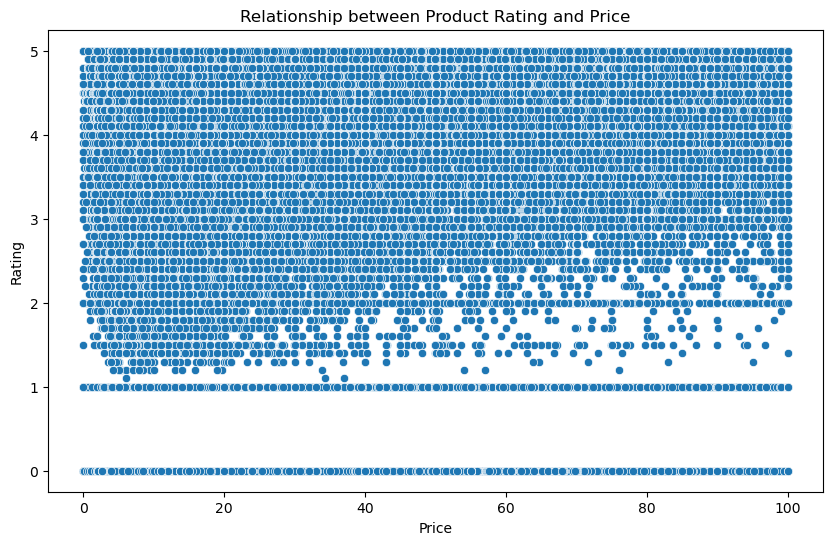

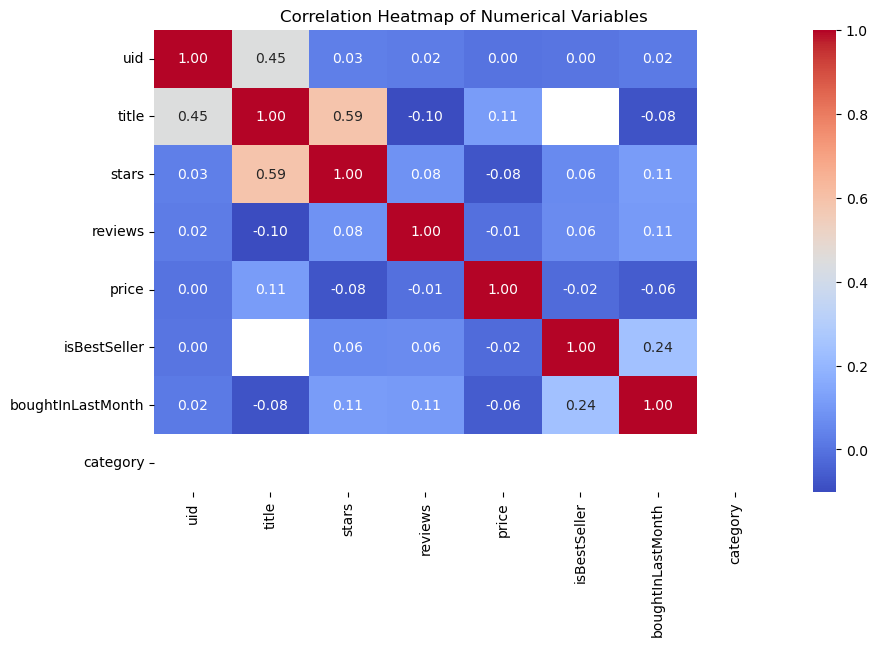

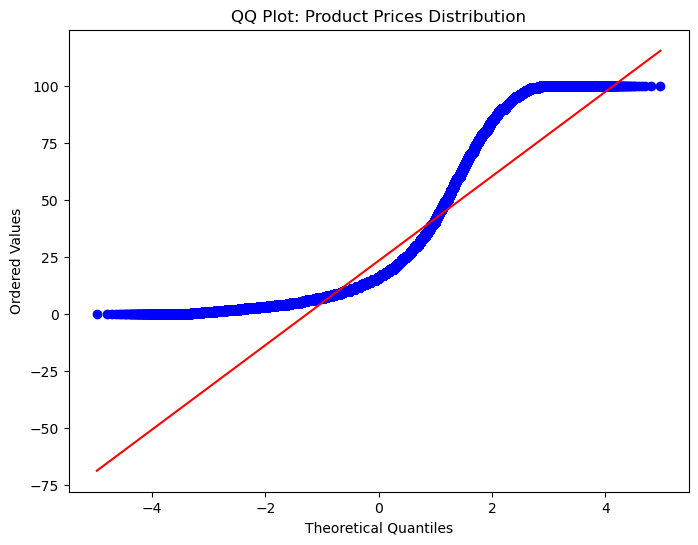

In [30]:
df_numeric = df.drop(columns=['asin'])
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')
df_numeric.dropna(subset=['price', 'stars'], inplace=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='stars', data=df_numeric)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Relationship between Product Rating and Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

plt.figure(figsize=(8, 6))
probplot(df_numeric['price'], dist="norm", plot=plt)
plt.title('QQ Plot: Product Prices Distribution')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()
